# python实现基于长短期记忆网络LSTM模型预测茅台股票价格趋势

In [5]:
# Import Library
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential 
from keras.layers import Dense, LSTM

In [7]:
maotai = pd.read_csv("maotai.csv", index_col='Date')
maotai.columns = ['Open','Close', 'High', 'Low', 'Adj_close', 'Volumn']

# Handling missing values and data anomalies

In [8]:
print( maotai.isnull().sum())
maotai['Adj_close'].plot()
maotai['Adj_close'].hist(bins=500)

Open         0
Close        0
High         0
Low          0
Adj_close    0
Volumn       0
dtype: int64

# Data prepare and split

In [75]:
def splitData(data):
    train_data = data[:1400]
    test_data = data[1400:]
    train_prices = train_data.values.reshape(-1,1)
    test_prices = test_data.values.reshape(-1,1)
    
    scaler = MinMaxScaler(feature_range = (0,1))
    train_scaled = scaler.fit_transform(train_prices)
    test_scaled = scaler.fit_transform(test_prices)
    print(train_scaled.shape, test_scaled.shape)
    
    return scaler, train_scaled, test_scaled
    
scaler, train_scaled, test_scaled = splitData(data = maotai['Close'])

(1400, 1) (466, 1)


In [37]:
def createData(timesteps, df):
    X_train = []
    y_train = []
    for i in range(timesteps, len(df)):
        X_train.append(df[i-timesteps:i, 0])
        y_train.append(df[i,0])
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
    print(X_train.shape, y_train.shape)
    return X_train, y_train
        
    
X_train, y_train = createData(30,train_scaled)   
X_test, y_test = createData(30, test_scaled)

(1370, 30, 1) (1370,)
(436, 30, 1) (436,)


# LSTM Model

In [73]:
import keras
def create_lstm(timesteps, feature_dim):
    model = Sequential()
    model.add(LSTM(50, input_shape=(timesteps, feature_dim), return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer ='adam',metrics='mse')
    return model 

model = create_lstm(30,1)

In [65]:
history = model.fit(X_train, y_train, epochs =50, batch_size =32)

Epoch 1/50
43/43 [==============================] - 1s 32ms/step - loss: 1.5526e-04 - mse: 1.5526e-04
Epoch 2/50
43/43 [==============================] - 1s 29ms/step - loss: 1.5856e-04 - mse: 1.5856e-04
Epoch 3/50
43/43 [==============================] - 3s 63ms/step - loss: 1.4813e-04 - mse: 1.4813e-04
Epoch 4/50
43/43 [==============================] - 3s 76ms/step - loss: 1.6072e-04 - mse: 1.6072e-04
Epoch 5/50
43/43 [==============================] - 3s 76ms/step - loss: 1.3778e-04 - mse: 1.3778e-04
Epoch 6/50
43/43 [==============================] - 2s 43ms/step - loss: 1.5279e-04 - mse: 1.5279e-04
Epoch 7/50
43/43 [==============================] - 2s 37ms/step - loss: 1.4662e-04 - mse: 1.4662e-04
Epoch 8/50
43/43 [==============================] - 2s 38ms/step - loss: 1.2527e-04 - mse: 1.2527e-04
Epoch 9/50
43/43 [==============================] - 1s 32ms/step - loss: 1.9142e-04 - mse: 1.9142e-04
Epoch 10/50
43/43 [==============================] - 2s 35ms/step - loss: 1.4090e-

In [55]:
# Test data 
predicted_prices = model.evaluate(X_test, y_test)

14/14 [==============================] - 1s 9ms/step - loss: 0.0020 - mse: 0.0020


findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


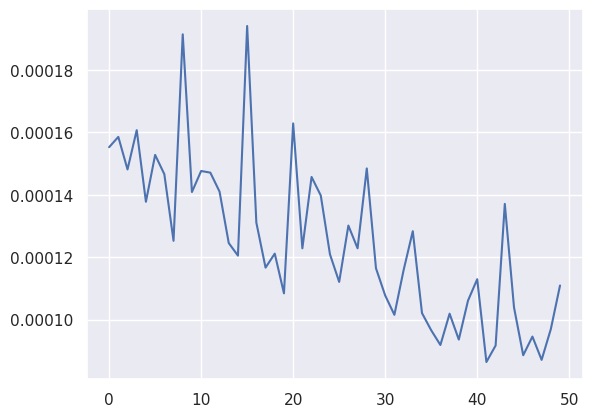

In [70]:
plt.plot(history.history['loss'])

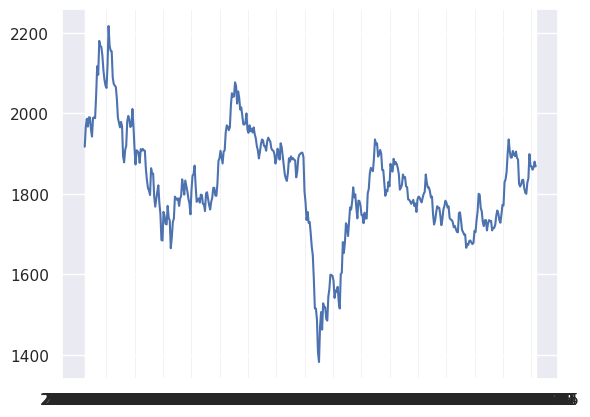

In [94]:
# Plot Result 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(font='SimHei')
train_prices_scaled = scaler.inverse_transform(train_scaled)
test_prices_scaled = scaler.inverse_transform(test_scaled)
pred_prices_scaled = scaler.inverse_transform(predicted_prices)
test_dates = pd.to_datetime(maotai['Close'][1400:].index[30:])

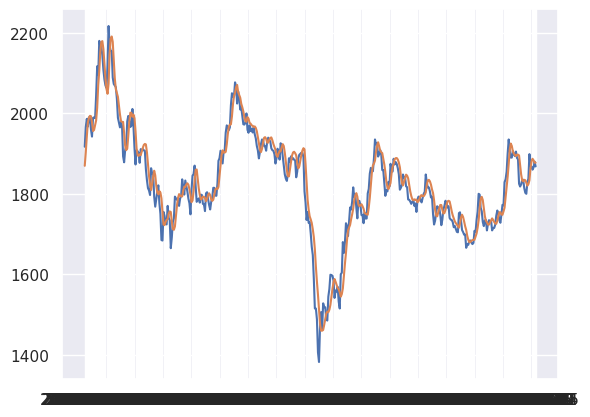

In [95]:
timesteps = 30
plt.plot(test_dates.astype("str"), test_prices_scaled[timesteps:])
plt.plot(test_dates.astype("str"), pred_prices_scaled)